In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import copy

## Get Data

In [66]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
print("Total Data", len(df_kend_train))
df_kend_train.head()

Total Data 230625


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.409000,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.367431,0.172840,0.512111
2,0.459542,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.496727,0.981481,0.377163
3,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495196,0.536338,0.537037,0.636678
4,0.000000,0.015385,1.0,0.673077,1.0,0.5,1.000000,0.310270,0.932099,0.557093


## Select Attribute for Clustering

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

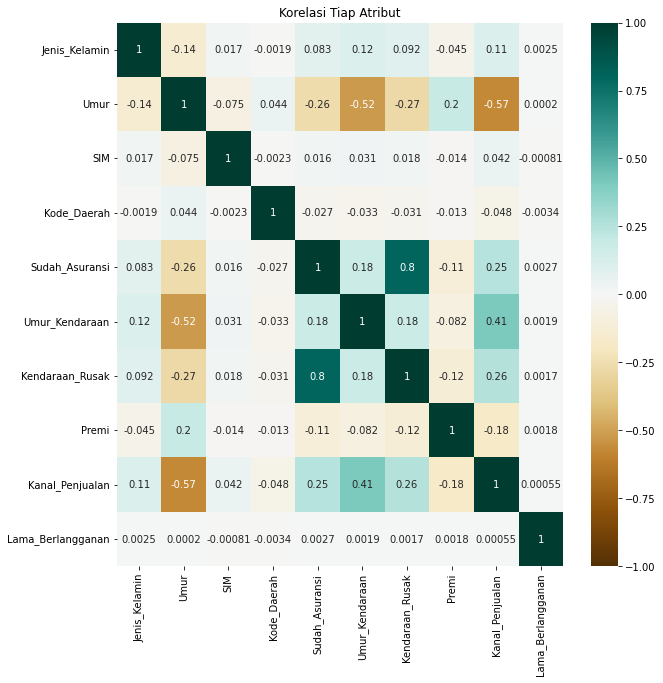

In [67]:
corr = df_kend_train.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [68]:
x = 'Umur'
y = 'Kanal_Penjualan'
# x = 'Umur'
# y = 'Premi'
# mengambil data yang diperlukan untuk clustering
df_kend_train =df_kend_train[[x, y]]
df = copy.deepcopy(df_kend_train)
df['Cluster'] = ""
df['Color'] = ""
df.head()

,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,,
1,0.430769,0.172840,,
2,0.015385,0.981481,,
3,0.461538,0.537037,,
4,0.015385,0.932099,,


## Kmeans Function

### Initiate Centroid with Random Value

In [69]:
def initialCentroid(k, x, y, df):  
  randValue = {}
  # memasukkan nilai random ke tiap centroid sesuai jumlah kluster
  for i in range(k):
    randValue[i] = [df[x][random.randint(0, len(df))], df[y][random.randint(0, len(df))]]  
  return randValue

### Calculate Distance Using Euclidean

In [70]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, centroids):
  colors = ['blue','orange','brown','red','olive','green','pink','grey','purple','cyan','gray']  
  dftmp = df.copy()  
  clus = []
  color = []
  # memasukkan data sesuai clusternya
  for data in df.index:    
    dist = []
    rowData = [df[x][data], df[y][data]]
    # menghitung distance antar centroid dengan data
    for centroid in centroids:
      dist.append(calcEuclidean(rowData, centroids[centroid]))            
    clusIdx = dist.index(min(dist))
    # memasukkan hasil paling minimum sesuai clusternya
    clus.append(clusIdx)
    # memasukkan color sesuai index paling minimum
    color.append(colors[clusIdx])    
  dftmp['Cluster'] = clus
  dftmp['Color'] = color
  return dftmp

### Set New Centroid

In [71]:
def setCentroid(centroids, x, y, df):
  # menentukan centroid baru dengan mengambil rata-rata dari tiap clusternya
  for i in centroids.keys():    
    centroids[i][0] = np.mean(df.loc[df['Cluster']==i, x])
    centroids[i][1] = np.mean(df.loc[df['Cluster']==i, y])
  return centroids

### Main Function KMeans

In [72]:
def kMeans(k, x, y, df):      
  centroid = initialCentroid(k, x, y, df)  
  same = False
  i = 0    
  while(same == False):    
    old_centroid = copy.deepcopy(centroid)    
    df = calcDist(df, centroid)    
    centroid = setCentroid(centroid, x, y, df)            

    print('iterasi ke-', i)
    print('Centroid Sekarang:')
    for key in centroid.keys():
      print(key, ': ', centroid.get(key))
    if (old_centroid == centroid):
      print('amsu')
      same = True    
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Centroid:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))   
       
  return centroid, df

## Make Cluster Visualisation Function

In [73]:
def visualisasi_cluster(df, x, y, centroid):
  plt.figure(figsize=(6,6))
  plt.title('Visualisasi Hasil Clustering')
  # memasukkan data x dan y ke dalam scatter beserta warna yang sesuai dengan clusternya
  plt.scatter(df[x], df[y], color=df['Color'], alpha=0.5)
  # memasukkan centroid sesuai dengan posisi clusternya masing-masing
  for i in range(k):    
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p',s=200)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Proses Clustering with 3 total cluster

In [74]:
k = 2
centroid, df_hasil = kMeans(k, x, y, df)
df_hasil

rand:  {0: [0.4153846153846154, 0.1358024691358024], 1: [0.1538461538461538, 0.7592592592592592]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.47001226101942284, 0.15488354552038583]
1 :  [0.21563746859219254, 0.8686573156222234]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.4706748048371941, 0.1561685711559753]
1 :  [0.21517953905595275, 0.8688653598444733]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.4706944711699959, 0.15619606706093467]
1 :  [0.21516834067105978, 0.8688683879457781]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.4706944711699959, 0.15619606706093467]
1 :  [0.21516834067105978, 0.8688683879457781]
amsu
Perulangan ke 3
Hasil Akhir Centroid:
0 :  [0.4706944711699959, 0.15619606706093467]
1 :  [0.21516834067105978, 0.8688683879457781]


,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,1,orange
1,0.430769,0.172840,0,blue
2,0.015385,0.981481,1,orange
3,0.461538,0.537037,0,blue
4,0.015385,0.932099,1,orange
...,...,...,...,...
230620,0.046154,0.932099,1,orange
230621,0.015385,0.932099,1,orange
230622,0.046154,0.932099,1,orange
230623,0.738462,0.759259,1,orange


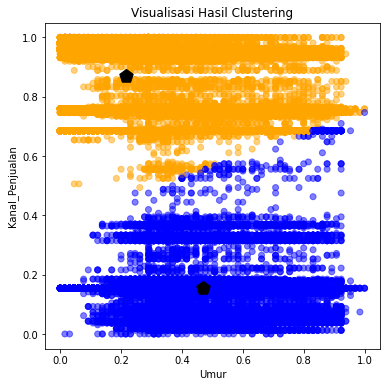

In [75]:
visualisasi_cluster(df_hasil, x, y, centroid)

## Evaluasi Model

### Elbow Method

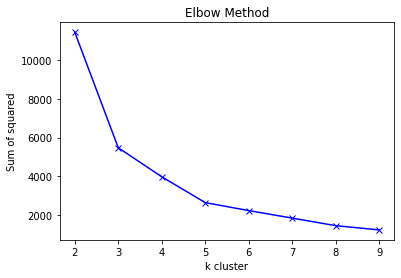

In [76]:
wcss = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kend_train)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k cluster')
plt.ylabel('Sum of squared')
plt.title('Elbow Method')
plt.show()

### Silhouette Analysis

In [79]:
n_clusters = [2,3,4]
for i,k in enumerate(n_clusters):        
  km = KMeans(n_clusters=k)
  predict = km.fit_predict(df_kend_train)
  score = silhouette_score(df_kend_train, predict, metric="euclidean")
  print("For ", k, "n_clusters silhouette score is ", score)

For  2 n_clusters silhouette score is  0.6724621300381503
For  3 n_clusters silhouette score is  0.6276552709337907
For  4 n_clusters silhouette score is  0.5997813386854385


## Eksperimen

### Test Jumlah Cluster Berdasarkan Evaluasi

rand:  {0: [0.1076923076923077, 0.9320987654320988], 1: [0.0153846153846153, 0.1296296296296296], 2: [0.0461538461538461, 0.7592592592592592]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.21487689728154138, 0.894553905402441]
1 :  [0.4684601865867517, 0.15261106069167837]
2 :  [0.22564026359260989, 0.728635618742184]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.11746661991738229, 0.9391834283324771]
1 :  [0.46880810066207756, 0.15309775984802104]
2 :  [0.39126907187034726, 0.7431740731414883]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.09172980837509623, 0.9213730522528861]
1 :  [0.46849551945890494, 0.15267696135497258]
2 :  [0.45011065173795367, 0.7689435020652629]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.09411492422068023, 0.9163087054301752]
1 :  [0.4684699975430498, 0.1526856829096017]
2 :  [0.4628034730847571, 0.7717130856262124]
iterasi ke- 4
Centroid Sekarang:
0 :  [0.09465493598000532, 0.9159286200167019]
1 :  [0.4684687993244869, 0.15268037112489533]
2 :  [0.46417394268888595, 0.7715125

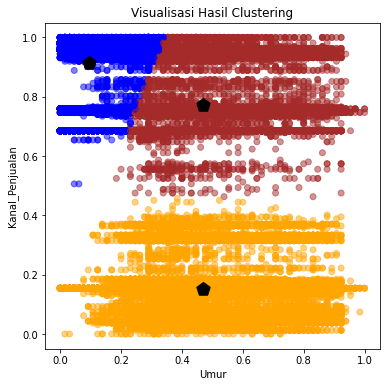

In [78]:
k = 3
centroid, df_hasil = kMeans(k, x, y, df)
visualisasi_cluster(df_hasil, x, y, centroid)